In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [94]:
df = pd.read_csv('/content/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [95]:
df['Purchased'].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [96]:
df.drop(['User ID'],inplace=True,axis=1)
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [97]:
df.isna().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [98]:
duplicates = df[df.duplicated()]
duplicates

,Gender,Age,EstimatedSalary,Purchased
74,Male,32,18000,0
94,Female,29,83000,0
186,Female,20,82000,0
192,Male,29,43000,0
231,Male,39,42000,0
236,Male,40,57000,0
256,Female,41,72000,0
257,Male,40,57000,0
312,Female,38,50000,0
322,Male,41,52000,0


In [99]:
df['Gender'] = df['Gender'].map({'Male':1,'Female':0})
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [100]:
y = df['Purchased']
x = df.drop(['Purchased'],axis=1)

In [101]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((320, 3), (80, 3), (320,), (80,))

In [102]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [103]:
ln_model = LogisticRegression()
ln_model.fit(x_train,y_train)

LogisticRegression()

In [104]:
y_pred = ln_model.predict(x_test)

In [105]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score, recall_score , precision_score

In [106]:
print(confusion_matrix(y_test,y_pred))


[[50  2]
 [ 7 21]]


In [107]:
print(accuracy_score(y_test,y_pred))

0.8875


In [108]:
print(f1_score(y_test,y_pred))

0.8235294117647057


In [109]:
print(recall_score(y_test,y_pred))

0.75


In [110]:
from sklearn.neighbors import KNeighborsClassifier

In [111]:
metric_k =[]
neigbors = np.arange(1,25)

for k in neigbors:
  knn_model = KNeighborsClassifier(n_neighbors=k,metric='minkowski')
  knn_model.fit(x_train,y_train)
  y_pred = knn_model.predict(x_test)
  knn_acc = accuracy_score(y_test,y_pred)
  metric_k.append(knn_acc)

In [112]:
metric_k

[0.8875,
 0.8375,
 0.9125,
 0.9125,
 0.925,
 0.925,
 0.925,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.8625,
 0.875,
 0.875,
 0.875,
 0.8625]

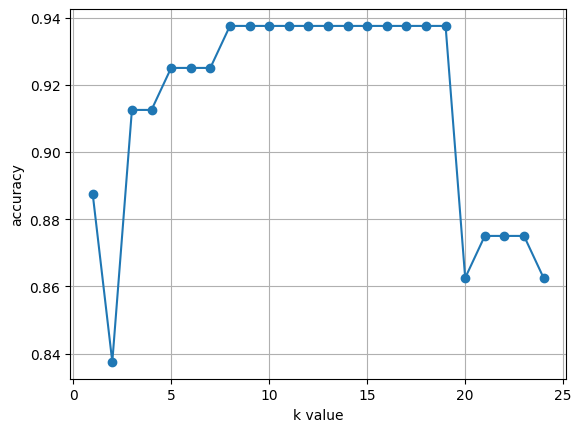

In [113]:
plt.plot(neigbors,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()
plt.show()

In [124]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
cv_scores=[]
for k in neigbors:
    knn_model = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=k))
    scores = cross_val_score(knn_model, x_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Find the optimal k with the highest cross-validated accuracy
optimal_k = neigbors[np.argmax(cv_scores)]

optimal_k

7

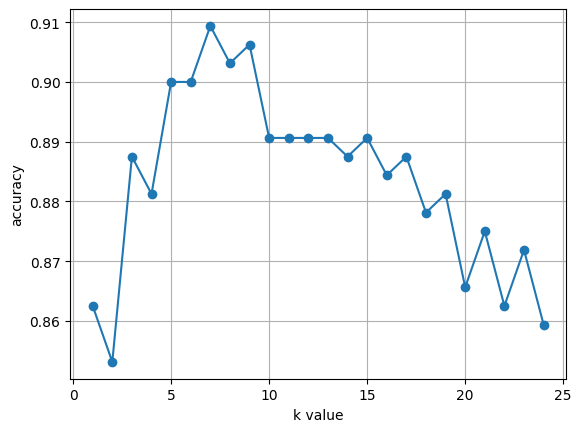

In [122]:
plt.plot(neigbors,cv_scores,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()
plt.show()

In [126]:
knn_class = KNeighborsClassifier(n_neighbors=11,metric='minkowski')
knn_class.fit(x_train,y_train)
knn_pred = knn_class.predict(x_test)
print(confusion_matrix(y_test,knn_pred))
print("Accuracy : ",accuracy_score(y_test,knn_pred))
print("f1 score :",f1_score(y_test,knn_pred))
print("Recall : ",recall_score(y_test,knn_pred))

[[49  3]
 [ 2 26]]
Accuracy :  0.9375
f1 score : 0.912280701754386
Recall :  0.9285714285714286


In [ ]:
# Gaussian Naive Bayes
# Multinomial Naive Bayes
# Bernoulli Naive Bayes

In [127]:
from sklearn.naive_bayes import GaussianNB
naive_model = GaussianNB()
naive_model.fit(x_train,y_train)
naive_pred = naive_model.predict(x_test)
print(confusion_matrix(y_test,naive_pred))
print("Accuracy : ",accuracy_score(y_test,naive_pred))
print("f1 score :",f1_score(y_test,naive_pred))
print("Recall : ",recall_score(y_test,naive_pred))

[[50  2]
 [ 3 25]]
Accuracy :  0.9375
f1 score : 0.9090909090909091
Recall :  0.8928571428571429


In [128]:
data = sns.load_dataset('titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [130]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline

# Load Titanic dataset
data = sns.load_dataset('titanic')

# Drop rows with missing target values and irrelevant columns
data.dropna(subset=['survived'], inplace=True)
data.drop(['embark_town', 'who', 'sex', 'deck', 'embark_town', 'alive', 'alone'], axis=1, inplace=True)

# Fill missing values in 'age' and 'fare' columns
data['age'].fillna(data['age'].median(), inplace=True)
data['fare'].fillna(data['fare'].median(), inplace=True)

# Convert categorical variables to numeric
data['class'] = LabelEncoder().fit_transform(data['class'])
data['adult_male'] = LabelEncoder().fit_transform(data['adult_male'])

# Define features and target
X = data[['pclass', 'age', 'fare', 'class', 'adult_male']]
y = data['survived']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# List of k values to evaluate
k_values = np.arange(1, 15)
cv_scores = []

# Perform cross-validation for different k values
for k in k_values:
    model = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=k))
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f'K={k}, Mean Accuracy: {scores.mean():.4f}, Standard Deviation: {scores.std():.4f}')
    cv_scores.append(scores.mean())

# Optionally: Fit and evaluate the final model on the test set with the best k
best_k = k_values[np.argmax(cv_scores)]  # Assume 5 is the best k after evaluation
final_model = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=best_k))
final_model.fit(X_train, y_train)
test_accuracy = final_model.score(X_test, y_test)
print(f'Test Set Accuracy with K={best_k}: {test_accuracy:.4f}')


K=1, Mean Accuracy: 0.7352, Standard Deviation: 0.0084
K=2, Mean Accuracy: 0.7881, Standard Deviation: 0.0334
K=3, Mean Accuracy: 0.7865, Standard Deviation: 0.0392
K=4, Mean Accuracy: 0.8074, Standard Deviation: 0.0326
K=5, Mean Accuracy: 0.7994, Standard Deviation: 0.0383
K=6, Mean Accuracy: 0.8138, Standard Deviation: 0.0301
K=7, Mean Accuracy: 0.8139, Standard Deviation: 0.0417
K=8, Mean Accuracy: 0.8138, Standard Deviation: 0.0347
K=9, Mean Accuracy: 0.8106, Standard Deviation: 0.0410
K=10, Mean Accuracy: 0.8122, Standard Deviation: 0.0367
K=11, Mean Accuracy: 0.8074, Standard Deviation: 0.0391
K=12, Mean Accuracy: 0.8057, Standard Deviation: 0.0396
K=13, Mean Accuracy: 0.8058, Standard Deviation: 0.0423
K=14, Mean Accuracy: 0.8090, Standard Deviation: 0.0442
Test Set Accuracy with K=7: 0.7948
